## **Biodata**

**Nama**: Dinar Wahyu Rahman

**Email**: dinarrahman30@gmail.com

**No.Telp**: 083806242160

**LinkedIn**: **[Dinar Wahyu Rahman](https://www.linkedin.com/in/dinar-wahyu-rahman-00a405162/)**

## Project review ID/X partners
1. Background
2. Data Overview
3. Exploratory Data Analysis
4. Preprocessing
5. Modelling
6. Summary

## import library

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## load dataset

In [2]:
credit = pd.read_csv('D:\DATA D\EXPERIA VIRTUAL INTERSHIP\loan_data_2007_2014.csv')
credit.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
credit.shape

(466285, 75)

## data preprocessing

### mencari missing value

In [4]:
credit_null = credit.isnull().sum()
credit_null

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [5]:
full_non_null = [col for col in credit.columns if credit[col].isnull().all()]
print(full_non_null)
print(len(full_non_null),"column(s)")

['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
17 column(s)


In [6]:
credit = credit.drop(axis=1, columns=full_non_null)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
percent_missing = credit.isnull().sum() * 100 / len(credit)
dtypes=[credit[col].dtype for col in credit.columns]
missing_value = pd.DataFrame({'data_type':dtypes,
                                 'percent_missing': percent_missing})
missing_value.sort_values('percent_missing', ascending=False, inplace=True)
missing_value.head(10)

,data_type,percent_missing
mths_since_last_record,float64,86.566585
mths_since_last_major_derog,float64,78.773926
desc,object,72.981546
mths_since_last_delinq,float64,53.690554
next_pymnt_d,object,48.728567
tot_cur_bal,float64,15.071469
tot_coll_amt,float64,15.071469
total_rev_hi_lim,float64,15.071469
emp_title,object,5.916553
emp_length,object,4.505399


In [8]:
credit.duplicated().sum()

0

### handling missing value

In [9]:
credit = credit[credit.columns[~credit.columns.isin(['mths_since_last_record','desc','next_pymnt_d'])]]
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [10]:
credit.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,171.62,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,119.66,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [11]:
for col in ['mths_since_last_major_derog','mths_since_last_delinq']:
    credit[col] = credit[col].fillna(0)

In [12]:
credit[['mths_since_last_major_derog','mths_since_last_delinq']].isnull().sum()

mths_since_last_major_derog    0
mths_since_last_delinq         0
dtype: int64

In [13]:
for col in credit.select_dtypes(exclude='object'):
    credit[col] = credit[col].fillna(credit[col].median())
credit.isnull().sum()

Unnamed: 0                         0
id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      27588
emp_length                     21008
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                             20
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                  29
i

In [14]:
for col in credit.select_dtypes(include='object'):
    credit[col] = credit[col].fillna(credit[col].mode().iloc[0])
print("Updated Missing Values")
credit.isnull().sum()

Updated Missing Values


Unnamed: 0                     0
id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec   

In [15]:
credit.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,171.62,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,119.66,Sep-13,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,649.91,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


In [16]:
print("Unique Features (Numerical)")
print(credit.select_dtypes(exclude='object').nunique())

Unique Features (Numerical)
Unnamed: 0                     466285
id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
int_rate                          506
installment                     55622
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
out_prncp_inv                  141189
total_pymnt                    351609
total_pymnt_inv                347659
total_rec_prncp                172713
total_rec_int                  270249
total_rec_late_fee               5808
recoveries            

In [17]:
print("Unique Features (Categorical)")
print(credit.select_dtypes(exclude=['int','float']).nunique())

Unique Features (Categorical)
Unnamed: 0             466285
id                     466285
member_id              466285
loan_amnt                1352
funded_amnt              1354
term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
purpose                    14
title                   63099
zip_code                  888
addr_state                 50
earliest_cr_line          664
revol_bal               58142
initial_list_status         2
last_pymnt_d               98
last_credit_pull_d        103
policy_code                 1
application_type            1
dtype: int64


In [18]:
credit["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [19]:
def word_strip(x):
  return x.strip()
  
credit['term'] = credit['term'].apply(lambda x: word_strip(x))
credit["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [20]:
credit["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [21]:
credit["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [22]:
credit["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [23]:
credit["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [24]:
credit["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [25]:
credit["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [26]:
credit["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [27]:
target_dict = {'Fully Paid':1,
               'Does not meet the credit policy. Status:Fully Paid':1,
               'Charged Off':0,
               'Does not meet the credit policy. Status:Charged Off':0,
               'Default':0,
               'Late (31-120 days)':0,
               'Current':-1,
               'In Grace Period':-1,
               'Late (16-30 days)':-1}
# Create the mapped values in a new column
credit['loan_status'] = credit['loan_status'].map(target_dict)
# Review dataset
credit.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,171.62,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,119.66,Sep-13,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,649.91,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,357.48,Jan-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,67.79,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


In [28]:
credit = credit.loc[~credit['loan_status'].isin([-1])].reset_index(drop=True)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   237695 non-null  int64  
 1   id                           237695 non-null  int64  
 2   member_id                    237695 non-null  int64  
 3   loan_amnt                    237695 non-null  int64  
 4   funded_amnt                  237695 non-null  int64  
 5   funded_amnt_inv              237695 non-null  float64
 6   term                         237695 non-null  object 
 7   int_rate                     237695 non-null  float64
 8   installment                  237695 non-null  float64
 9   grade                        237695 non-null  object 
 10  sub_grade                    237695 non-null  object 
 11  emp_title                    237695 non-null  object 
 12  emp_length                   237695 non-null  object 
 13 

In [29]:
credit.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
237690,466276,9695736,11547808,8525,8525,8525.0,60 months,18.25,217.65,D,...,217.65,Oct-14,0.0,4.0,1,INDIVIDUAL,0.0,0.0,116995.0,49800.0
237691,466277,9007579,10799568,18000,18000,17975.0,36 months,7.90,563.23,A,...,563.23,Oct-14,0.0,14.0,1,INDIVIDUAL,0.0,0.0,42592.0,50300.0
237692,466278,9745590,11597671,10000,10000,10000.0,36 months,18.25,362.78,D,...,5501.60,Jan-16,0.0,32.0,1,INDIVIDUAL,0.0,0.0,10170.0,11100.0
237693,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,17.50,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
237694,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,1500.68,Apr-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


In [30]:
credit['earliest_cr_line'].value_counts()

Oct-00    2056
Oct-99    1883
Nov-00    1847
Oct-01    1840
Nov-99    1807
          ... 
Feb-57       1
Jan-60       1
Apr-55       1
Sep-56       1
May-60       1
Name: earliest_cr_line, Length: 634, dtype: int64

In [31]:
credit['earliest_cr_line'] = pd.to_datetime(credit['earliest_cr_line'], format='%b-%y')

In [32]:
credit['last_credit_pull_d'].value_counts()

Jan-16    100503
Dec-15     13771
Nov-15      8233
Sep-15      7982
Oct-15      7846
           ...  
Dec-07         3
Jul-08         1
Jul-07         1
Jun-08         1
May-08         1
Name: last_credit_pull_d, Length: 103, dtype: int64

In [33]:
credit['last_pymnt_d'].value_counts()

Jul-15    11703
Oct-15    11248
Sep-15    10204
Mar-15    10087
Jun-15    10078
          ...  
Jun-08       20
Mar-08       18
Jan-08       11
Feb-08        8
Dec-07        2
Name: last_pymnt_d, Length: 98, dtype: int64

In [34]:
credit['issue_d'].value_counts()

Oct-14    9704
Jul-14    9226
Apr-14    7121
Nov-13    6904
Dec-13    6893
          ... 
Aug-07      74
Jul-07      63
Sep-08      57
Sep-07      53
Jun-07      24
Name: issue_d, Length: 91, dtype: int64

In [35]:
credit[['issue_d','last_pymnt_d','last_credit_pull_d']].head(3)

,issue_d,last_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-15,Jan-16
1,Dec-11,Apr-13,Sep-13
2,Dec-11,Jun-14,Jan-16


In [36]:
def date_time(dt):
  if dt.year > 2016:
    dt = dt.replace(year=dt.year-100)
  return dt

In [37]:
credit['earliest_cr_line'] = pd.to_datetime(credit['earliest_cr_line'], format='%b-%y')
credit['earliest_cr_line'] = credit['earliest_cr_line'].apply(lambda x: date_time(x))
credit['issue_d'] = pd.to_datetime(credit['issue_d'], format='%b-%y')
credit['last_pymnt_d'] = pd.to_datetime(credit['last_pymnt_d'],format='%b-%y')
credit['last_credit_pull_d'] = pd.to_datetime(credit['last_credit_pull_d'],format='%b-%y')
credit[['earliest_cr_line','issue_d','last_pymnt_d','last_credit_pull_d']].head(3)

,earliest_cr_line,issue_d,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2011-12-01,2015-01-01,2016-01-01
1,1999-04-01,2011-12-01,2013-04-01,2013-09-01
2,2001-11-01,2011-12-01,2014-06-01,2016-01-01


In [38]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [39]:
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [40]:
((credit.apply(lambda x: diff_month(x.last_credit_pull_d, x.earliest_cr_line), axis=1) < 0)).any().any()

False

In [41]:
((credit.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1) < 0)).any().any()

False

In [42]:
credit['pymnt_time'] = credit.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1)
credit['credit_pull_year'] = credit.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis=1)
print('Adding features succeed')

Adding features succeed


In [43]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   237695 non-null  int64         
 1   id                           237695 non-null  int64         
 2   member_id                    237695 non-null  int64         
 3   loan_amnt                    237695 non-null  int64         
 4   funded_amnt                  237695 non-null  int64         
 5   funded_amnt_inv              237695 non-null  float64       
 6   term                         237695 non-null  object        
 7   int_rate                     237695 non-null  float64       
 8   installment                  237695 non-null  float64       
 9   grade                        237695 non-null  object        
 10  sub_grade                    237695 non-null  object        
 11  emp_title                 

In [44]:
credit.shape

(237695, 57)

In [45]:
credit.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14


In [46]:
credit.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,...,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
count,237695.000000,2.376950e+05,2.376950e+05,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,2.376950e+05,237695.000000,...,237695.000000,237695.000000,237695.000000,237695.0,237695.000000,2.376950e+05,2.376950e+05,2.376950e+05,237695.000000,237695.000000
mean,195200.469408,8.538434e+06,9.654050e+06,13474.354320,13428.704117,13299.951072,13.844646,416.623498,7.192614e+04,0.785574,...,5686.209093,0.005856,7.617001,1.0,0.002886,1.445875e+02,1.211644e+05,2.734911e+04,18.656960,17.543516
std,133663.663387,9.261314e+06,1.005098e+07,8061.451689,8036.706263,8074.666938,4.378830,243.631791,5.516305e+04,0.410424,...,6854.640584,0.082857,18.733495,0.0,0.058449,1.882389e+04,1.298310e+05,2.440079e+04,11.283279,7.047302
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
25%,82615.500000,1.375144e+06,1.612612e+06,7200.000000,7200.000000,7125.000000,10.990000,239.180000,4.500000e+04,1.000000,...,419.580000,0.000000,0.000000,1.0,0.000000,0.000000e+00,3.974250e+04,1.640000e+04,10.000000,13.000000
50%,182944.000000,5.425530e+06,6.438294e+06,12000.000000,12000.000000,11900.000000,13.670000,365.010000,6.142500e+04,1.000000,...,2973.230000,0.000000,0.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04,16.000000,16.000000
75%,295296.000000,1.245681e+07,1.442943e+07,18000.000000,18000.000000,18000.000000,16.590000,545.330000,8.600000e+04,1.000000,...,8852.010000,0.000000,0.000000,1.0,0.000000,0.000000e+00,1.568880e+05,2.940000e+04,27.000000,21.000000
max,466283.000000,3.785416e+07,4.061688e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,1.000000,...,36234.440000,6.000000,154.000000,1.0,5.000000,9.152545e+06,8.000078e+06,2.013133e+06,95.000000,68.000000


In [47]:
credit.describe(exclude=['int','float'])

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,term,grade,sub_grade,emp_title,emp_length,...,addr_state,earliest_cr_line,revol_bal,initial_list_status,last_pymnt_d,last_credit_pull_d,policy_code,application_type,pymnt_time,credit_pull_year
count,237695.000000,2.376950e+05,2.376950e+05,237695.000000,237695.000000,237695,237695,237695,237695,237695,...,237695,237695,2.376950e+05,237695,237695,237695,237695.0,237695,237695.000000,237695.000000
unique,NaN,NaN,NaN,NaN,NaN,2,7,35,129469,11,...,50,634,NaN,2,98,103,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,B,B3,Teacher,10+ years,...,CA,2000-10-01 00:00:00,NaN,f,2015-07-01 00:00:00,2016-01-01 00:00:00,NaN,INDIVIDUAL,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,185700,71990,17316,15023,80095,...,40386,2056,NaN,177046,11703,100503,NaN,237695,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1946-01-01 00:00:00,NaN,NaN,2007-12-01 00:00:00,2007-05-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2011-11-01 00:00:00,NaN,NaN,2016-01-01 00:00:00,2016-01-01 00:00:00,NaN,NaN,NaN,NaN
mean,195200.469408,8.538434e+06,9.654050e+06,13474.354320,13428.704117,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.522281e+04,NaN,NaN,NaN,1.0,NaN,18.656960,17.543516
std,133663.663387,9.261314e+06,1.005098e+07,8061.451689,8036.706263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.920837e+04,NaN,NaN,NaN,0.0,NaN,11.283279,7.047302
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000e+00,NaN,NaN,NaN,1.0,NaN,0.000000,1.000000
25%,82615.500000,1.375144e+06,1.612612e+06,7200.000000,7200.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.911000e+03,NaN,NaN,NaN,1.0,NaN,10.000000,13.000000


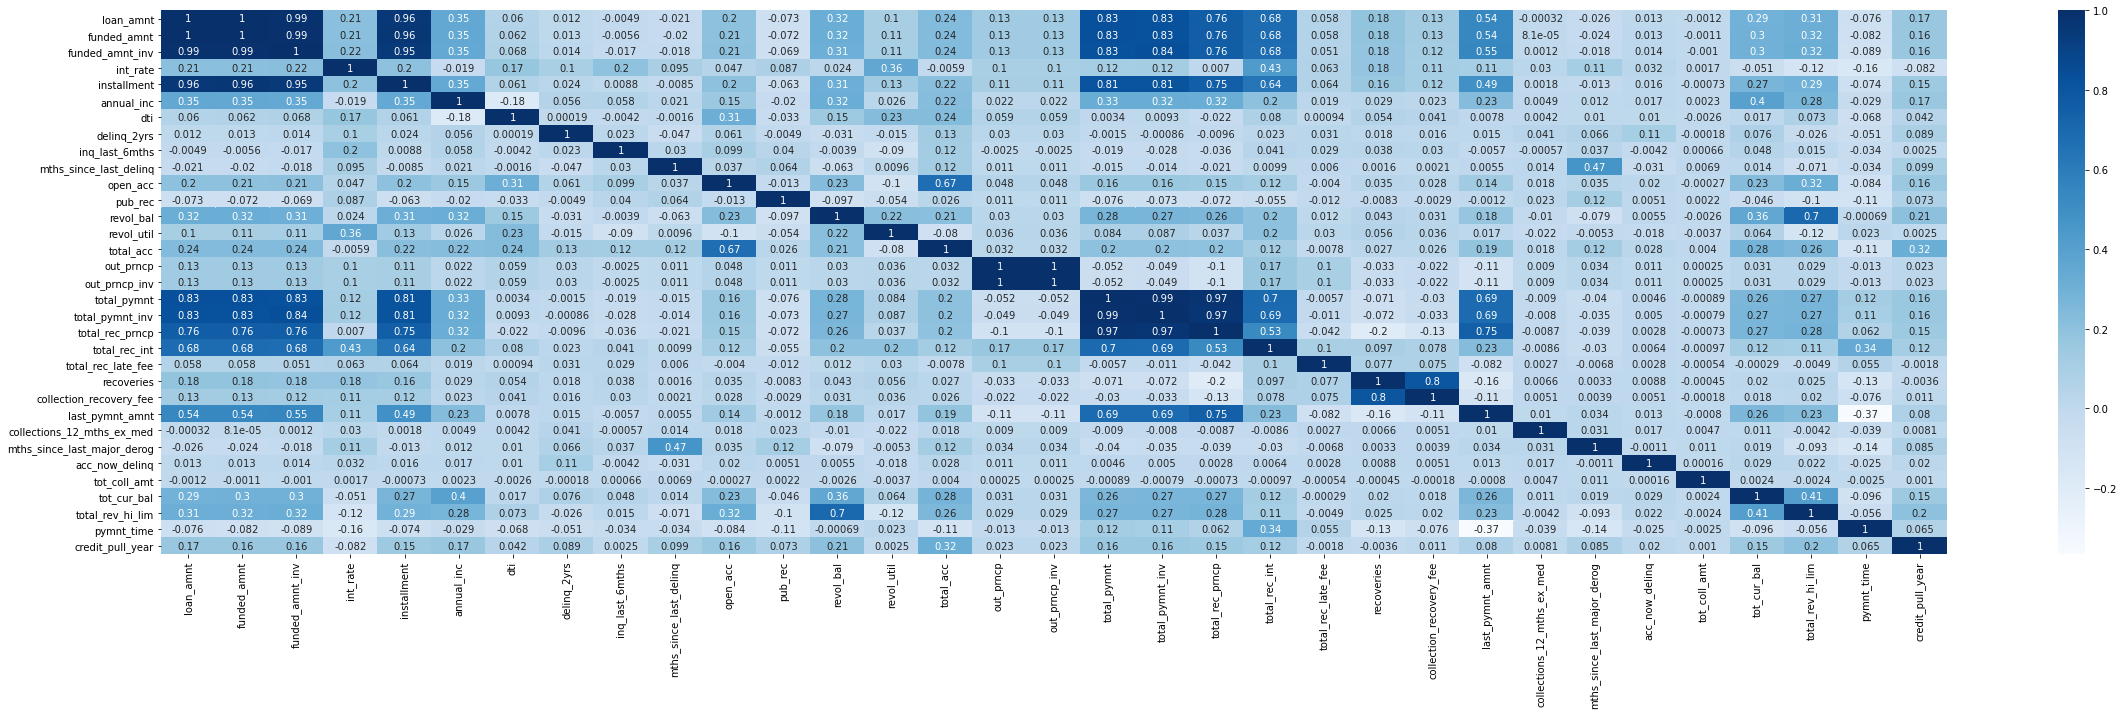

In [48]:
non_used = ['Unnamed: 0','id','member_id','policy_code','loan_status']
uni_dist = credit.select_dtypes(include=[np.float64,np.int64])
uni_dist = uni_dist[uni_dist.columns[~uni_dist.columns.isin(non_used)]]
fig = plt.figure(figsize = (40,10))
sns.heatmap(uni_dist.corr(),cmap='Blues', annot = True);

In [49]:
def top_correlation (df,n):
    corr_matrix = df.corr()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable_1","Variable_2","Correlation"]
    correlation = correlation.reindex(correlation.Correlation.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation.head(n)
print("High Correlated Features (Corr > 0.5)")
top_correlation(uni_dist,39)

High Correlated Features (Corr > 0.5)


,Variable_1,Variable_2,Correlation
0,out_prncp,out_prncp_inv,0.999999
1,loan_amnt,funded_amnt,0.997286
2,total_pymnt,total_pymnt_inv,0.993913
3,funded_amnt,funded_amnt_inv,0.992104
4,loan_amnt,funded_amnt_inv,0.988784
5,total_pymnt,total_rec_prncp,0.973771
6,total_pymnt_inv,total_rec_prncp,0.968241
7,funded_amnt,installment,0.959611
8,loan_amnt,installment,0.955520
9,funded_amnt_inv,installment,0.951136


In [50]:
uni_dist.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,0.0,...,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,0.0,...,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,0.0,...,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,...,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,5000,5000,5000.0,7.90,156.46,36000.0,11.20,0.0,3.0,0.0,...,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11


In [51]:
removed_unused = ['Unnamed: 0','id','member_id','policy_code','emp_title','url','title','zip_code','earliest_cr_line']
multicol = ['last_credit_pull_d','last_pymnt_d','issue_d','addr_state','application_type',
            'out_prncp_inv','funded_amnt','total_pymnt_inv','funded_amnt_inv','total_rec_prncp','out_prncp',
            'revol_bal','total_pymnt','recoveries','total_rec_int','total_acc','loan_amnt']
removed_all = removed_unused + multicol

In [52]:
credit_a = credit[credit.columns[~credit.columns.isin(removed_all)]].reset_index(drop=True)
credit_b = credit[credit.columns[~credit.columns.isin(removed_unused)]].reset_index(drop=True)

In [53]:
credit_a.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,...,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,...,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,...,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,...,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,1,...,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11


In [54]:
credit_b.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,2013-09-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,2015-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,2015-09-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,11


In [55]:
credit_a["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [56]:
def text_num(text):
  return [int(s) for s in text.split() if s.isdigit()][0]

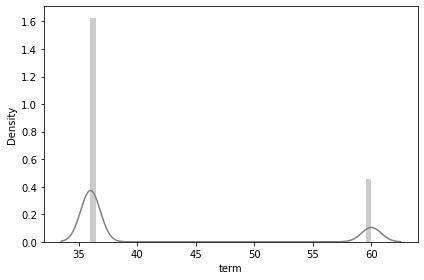

In [57]:
sns.distplot(credit_a["term"].apply(lambda x: text_num(x)), color='gray')
plt.tight_layout()
plt.show()

In [58]:
credit_a["term"] = credit_a["term"].apply(lambda x: text_num(x))
credit_a.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,...,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,...,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,...,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,...,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,1,...,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11


In [59]:
credit_a["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [60]:
target_dict = {'A':6,
               'B':5,
               'C':4,
               'D':3,
               'E':2,
               'F':1,
               'G':0}
# Create the mapped values in a new column
credit_a["grade"] = credit_a["grade"].map(target_dict)

In [61]:
credit_a.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36,10.65,162.87,5,B2,10+ years,RENT,24000.0,Verified,1,...,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60,15.27,59.83,4,C4,< 1 year,RENT,30000.0,Source Verified,0,...,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36,15.96,84.33,4,C5,10+ years,RENT,12252.0,Not Verified,1,...,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36,13.49,339.31,4,C1,10+ years,RENT,49200.0,Source Verified,1,...,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,36,7.90,156.46,6,A4,3 years,RENT,36000.0,Source Verified,1,...,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11


In [62]:
credit_a["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [63]:
def f_A(row):
    if row == 'A1':
        val = 1
    elif row == 'A2':
        val = 2
    elif row == 'A3':
        val = 3
    elif row == 'A4':
        val = 4
    elif row == 'A5':
        val = 5
    else:
        val = 0
    return val

def f_B(row):
    if row == 'B1':
        val = 1
    elif row == 'B2':
        val = 2
    elif row == 'B3':
        val = 3
    elif row == 'B4':
        val = 4
    elif row == 'B5':
        val = 5
    else:
        val = 0
    return val

def f_C(row):
    if row == 'C1':
        val = 1
    elif row == 'C2':
        val = 2
    elif row == 'C3':
        val = 3
    elif row == 'C4':
        val = 4
    elif row == 'C5':
        val = 5
    else:
        val = 0
    return val

def f_D(row):
    if row == 'D1':
        val = 1
    elif row == 'D2':
        val = 2
    elif row == 'D3':
        val = 3
    elif row == 'D4':
        val = 4
    elif row == 'D5':
        val = 5
    else:
        val = 0
    return val

def f_E(row):
    if row == 'E1':
        val = 1
    elif row == 'E2':
        val = 2
    elif row == 'E3':
        val = 3
    elif row == 'E4':
        val = 4
    elif row == 'E5':
        val = 5
    else:
        val = 0
    return val

def f_F(row):
    if row == 'F1':
        val = 1
    elif row == 'F2':
        val = 2
    elif row == 'F3':
        val = 3
    elif row == 'F4':
        val = 4
    elif row == 'F5':
        val = 5
    else:
        val = 0
    return val

def f_G(row):
    if row == 'G1':
        val = 1
    elif row == 'G2':
        val = 2
    elif row == 'G3':
        val = 3
    elif row == 'G4':
        val = 4
    elif row == 'G5':
        val = 5
    else:
        val = 0
    return val

In [64]:
credit_a['SubGrade_A'] = credit_a["sub_grade"].apply(f_A)
credit_a['SubGrade_B'] = credit_a["sub_grade"].apply(f_B)
credit_a['SubGrade_C'] = credit_a["sub_grade"].apply(f_C)
credit_a['SubGrade_D'] = credit_a["sub_grade"].apply(f_D)
credit_a['SubGrade_E'] = credit_a["sub_grade"].apply(f_E)
credit_a['SubGrade_F'] = credit_a["sub_grade"].apply(f_F)
credit_a['SubGrade_G'] = credit_a["sub_grade"].apply(f_G)
credit_a = credit_a.drop(axis=1, columns="sub_grade")

In [65]:
credit_a.head()

,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G
0,36,10.65,162.87,5,10+ years,RENT,24000.0,Verified,1,n,...,22800.0,37,31,0,2,0,0,0,0,0
1,60,15.27,59.83,4,< 1 year,RENT,30000.0,Source Verified,0,n,...,22800.0,16,14,0,0,4,0,0,0,0
2,36,15.96,84.33,4,10+ years,RENT,12252.0,Not Verified,1,n,...,22800.0,30,15,0,0,5,0,0,0,0
3,36,13.49,339.31,4,10+ years,RENT,49200.0,Source Verified,1,n,...,22800.0,37,19,0,0,1,0,0,0,0
4,36,7.90,156.46,6,3 years,RENT,36000.0,Source Verified,1,n,...,22800.0,37,11,4,0,0,0,0,0,0


In [66]:
credit_a["emp_length"].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [67]:
target_dict = {'< 1 year':0,
               '1 year':1,
               '2 years':2,
               '3 years':3,
               '4 years':4,
               '5 years':5,
               '6 years':6,
               '7 years':7,
               '8 years':8, 
               '9 years':9,
               '10+ years':10}
credit_a["emp_length"] = credit_a["emp_length"].map(target_dict)

In [68]:
credit_a.head()

,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G
0,36,10.65,162.87,5,10,RENT,24000.0,Verified,1,n,...,22800.0,37,31,0,2,0,0,0,0,0
1,60,15.27,59.83,4,0,RENT,30000.0,Source Verified,0,n,...,22800.0,16,14,0,0,4,0,0,0,0
2,36,15.96,84.33,4,10,RENT,12252.0,Not Verified,1,n,...,22800.0,30,15,0,0,5,0,0,0,0
3,36,13.49,339.31,4,10,RENT,49200.0,Source Verified,1,n,...,22800.0,37,19,0,0,1,0,0,0,0
4,36,7.90,156.46,6,3,RENT,36000.0,Source Verified,1,n,...,22800.0,37,11,4,0,0,0,0,0,0


In [69]:
credit_a["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [70]:
target_dict = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}
credit_a["home_ownership"] = credit_a["home_ownership"].map(target_dict)

In [71]:
credit_a.head()

,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G
0,36,10.65,162.87,5,10,RENT,24000.0,Verified,1,n,...,22800.0,37,31,0,2,0,0,0,0,0
1,60,15.27,59.83,4,0,RENT,30000.0,Source Verified,0,n,...,22800.0,16,14,0,0,4,0,0,0,0
2,36,15.96,84.33,4,10,RENT,12252.0,Not Verified,1,n,...,22800.0,30,15,0,0,5,0,0,0,0
3,36,13.49,339.31,4,10,RENT,49200.0,Source Verified,1,n,...,22800.0,37,19,0,0,1,0,0,0,0
4,36,7.90,156.46,6,3,RENT,36000.0,Source Verified,1,n,...,22800.0,37,11,4,0,0,0,0,0,0


In [72]:
encoder = OneHotEncoder(sparse=False)
credit_a_encoded = pd.DataFrame(encoder.fit_transform(credit_a[["home_ownership"]]))
credit_a_encoded.columns = encoder.get_feature_names(["home_ownership"])
credit_a = pd.concat([credit_a, credit_a_encoded], axis=1)
credit_a.drop(["home_ownership"] ,axis=1, inplace=True)
credit_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,loan_status,pymnt_plan,purpose,...,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,36,10.65,162.87,5,10,24000.0,Verified,1,n,credit_card,...,2,0,0,0,0,0,0.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,Source Verified,0,n,car,...,0,4,0,0,0,0,0.0,0.0,0.0,1.0
2,36,15.96,84.33,4,10,12252.0,Not Verified,1,n,small_business,...,0,5,0,0,0,0,0.0,0.0,0.0,1.0
3,36,13.49,339.31,4,10,49200.0,Source Verified,1,n,other,...,0,1,0,0,0,0,0.0,0.0,0.0,1.0
4,36,7.90,156.46,6,3,36000.0,Source Verified,1,n,wedding,...,0,0,0,0,0,0,0.0,0.0,0.0,1.0


In [73]:
credit_a['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [74]:
target_dict = {'n':0,
               'y':1}
credit_a["pymnt_plan"] = credit_a["pymnt_plan"].map(target_dict)

In [75]:
credit_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,loan_status,pymnt_plan,purpose,...,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,36,10.65,162.87,5,10,24000.0,Verified,1,0,credit_card,...,2,0,0,0,0,0,0.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,Source Verified,0,0,car,...,0,4,0,0,0,0,0.0,0.0,0.0,1.0
2,36,15.96,84.33,4,10,12252.0,Not Verified,1,0,small_business,...,0,5,0,0,0,0,0.0,0.0,0.0,1.0
3,36,13.49,339.31,4,10,49200.0,Source Verified,1,0,other,...,0,1,0,0,0,0,0.0,0.0,0.0,1.0
4,36,7.90,156.46,6,3,36000.0,Source Verified,1,0,wedding,...,0,0,0,0,0,0,0.0,0.0,0.0,1.0


In [76]:
credit_a["loan_status"].unique()

array([1, 0], dtype=int64)

In [77]:
credit_a["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [78]:
target_dict = {'debt_consolidation':'debt_consolidation',
               'credit_card':'credit_card',
               'home_improvement':'private_use',
               'other':'other',
               'major_purchase':'major_purchase',
               'small_business':'small_business',
               'car':'private_use',
               'medical':'private_use',
               'wedding':'private_use',
               'moving':'private_use',
               'house':'private_use',
               'vacation':'private_use',
               'educational':'private_use',
               'renewable_energy':'other'}
credit_a["purpose"] = credit_a["purpose"].map(target_dict)

In [79]:
credit_a["purpose"].value_counts()

debt_consolidation    138318
credit_card            47421
private_use            27348
other                  13891
major_purchase          5951
small_business          4766
Name: purpose, dtype: int64

In [80]:
encoder = OneHotEncoder(sparse=False)
credit_a_encoded = pd.DataFrame(encoder.fit_transform(credit_a[["purpose"]]))
credit_a_encoded.columns = encoder.get_feature_names(["purpose"])
credit_a = pd.concat([credit_a, credit_a_encoded], axis=1)
credit_a.drop(["purpose"] ,axis=1, inplace=True)
credit_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,loan_status,pymnt_plan,dti,...,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business
0,36,10.65,162.87,5,10,24000.0,Verified,1,0,27.65,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,60,15.27,59.83,4,0,30000.0,Source Verified,0,0,1.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,Not Verified,1,0,8.72,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,36,13.49,339.31,4,10,49200.0,Source Verified,1,0,20.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,36,7.90,156.46,6,3,36000.0,Source Verified,1,0,11.20,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [81]:
credit_a["initial_list_status"].unique()

array(['f', 'w'], dtype=object)

In [82]:
encoder = OneHotEncoder(sparse=False)
credit_a_encoded = pd.DataFrame(encoder.fit_transform(credit_a[["initial_list_status"]]))
credit_a_encoded.columns = encoder.get_feature_names(["initial_list_status"])
credit_a = pd.concat([credit_a, credit_a_encoded], axis=1)
credit_a.drop(["initial_list_status"] ,axis=1, inplace=True)
credit_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,loan_status,pymnt_plan,dti,...,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,36,10.65,162.87,5,10,24000.0,Verified,1,0,27.65,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60,15.27,59.83,4,0,30000.0,Source Verified,0,0,1.00,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,Not Verified,1,0,8.72,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,36,13.49,339.31,4,10,49200.0,Source Verified,1,0,20.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,36,7.90,156.46,6,3,36000.0,Source Verified,1,0,11.20,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [83]:
credit_a["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [84]:
encoder = OneHotEncoder(sparse=False)
credit_a_encoded = pd.DataFrame(encoder.fit_transform(credit_a[["verification_status"]]))
credit_a_encoded.columns = encoder.get_feature_names(["verification_status"])
credit_a = pd.concat([credit_a, credit_a_encoded], axis=1)
credit_a.drop(["verification_status"] ,axis=1, inplace=True)
credit_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,...,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,0,8.72,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,36,13.49,339.31,4,10,49200.0,1,0,20.00,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,36,7.90,156.46,6,3,36000.0,1,0,11.20,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [85]:
credit_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 48 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   term                                 237695 non-null  int64  
 1   int_rate                             237695 non-null  float64
 2   installment                          237695 non-null  float64
 3   grade                                237695 non-null  int64  
 4   emp_length                           237695 non-null  int64  
 5   annual_inc                           237695 non-null  float64
 6   loan_status                          237695 non-null  int64  
 7   pymnt_plan                           237695 non-null  int64  
 8   dti                                  237695 non-null  float64
 9   delinq_2yrs                          237695 non-null  float64
 10  inq_last_6mths                       237695 non-null  float64
 11  mths_since_la

In [86]:
credit_a.head(2)

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,...,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [87]:
credit_a['delinq_2yrs'].unique()

array([ 0.,  2.,  3.,  1.,  4.,  6.,  5.,  8.,  7.,  9., 11., 13., 15.,
       10., 17., 18., 12., 29., 14., 21., 22., 16., 19.])

In [88]:
credit_a['inq_last_6mths'].unique()

array([ 1.,  5.,  2.,  3.,  0.,  4.,  6.,  7.,  8.,  9., 10., 11., 12.,
       15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25., 27.,
       20., 19.])

In [89]:
credit_a['open_acc'].unique()

array([ 3.,  2., 10.,  9.,  4., 11., 14., 12., 20.,  8.,  7.,  6., 15.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 29., 28., 33., 31., 39., 35., 36., 38., 44., 41.,
       42.,  1., 46., 37., 47., 40., 49., 45., 43.,  0., 48., 50., 52.,
       76., 55., 58., 54., 51.])

In [90]:
credit_a['mths_since_last_major_derog'].unique()

array([  0.,  53.,  69.,  71.,  59.,  62.,  39.,  70.,  11.,  49.,  34.,
        74.,  60.,  45.,  51.,  48.,  10.,  27.,  22.,  57.,  56.,  61.,
        35.,  23.,  58.,  25.,  46.,  63.,  33.,  47.,  28.,  21.,  41.,
        50.,  52.,  80.,  68.,  65.,  30.,  26.,  75.,  16.,  32.,  73.,
        14.,   5.,  67.,  13.,  29.,  19.,  40.,  64.,  44.,  38.,  54.,
         4.,   9.,  24.,  42.,  94.,  37.,  66.,  79.,  36.,   8., 110.,
        17.,  31.,   1.,  76.,  81.,  84.,  18.,  20.,  43.,   7.,  78.,
        55.,  15.,   2.,  72.,  77.,   3.,  82., 100.,  12., 111., 102.,
         6.,  93., 135., 152.,  92.,  88.,  83.,  87., 122.,  86.,  91.,
       134.,  89.,  99.,  96., 119., 101., 109.,  85., 113., 120., 139.,
       106., 131.,  95.,  90., 141., 115., 116., 148., 104., 105., 137.,
        98., 114., 128., 133., 154., 121., 107., 151., 103., 118., 108.,
       142.,  97., 125., 132., 112., 123., 126., 136., 127., 130., 140.,
       117., 124., 150.])

In [91]:
len(credit_a['mths_since_last_major_derog'].unique())

146

In [92]:
def subset_by_iqr(df, column):
    whisker_width=1.5
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter].reset_index(drop=True)

In [93]:
numerical = ['int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
             'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
             'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']
             
outlier = ['installment','annual_inc','open_acc','total_rec_late_fee','last_pymnt_amnt','total_rev_hi_lim',
           'tot_coll_amt','collection_recovery_fee','tot_cur_bal','pymnt_time','credit_pull_year']

In [94]:
print(f'Count of rows before removing outlier: {len(credit_a)}')
for i in outlier:
  credit_a_out = subset_by_iqr(credit_a, i) 
print(f'Count of rows after removing outlier: {len(credit_a_out)}')

Count of rows before removing outlier: 237695
Count of rows after removing outlier: 230237


## EDA

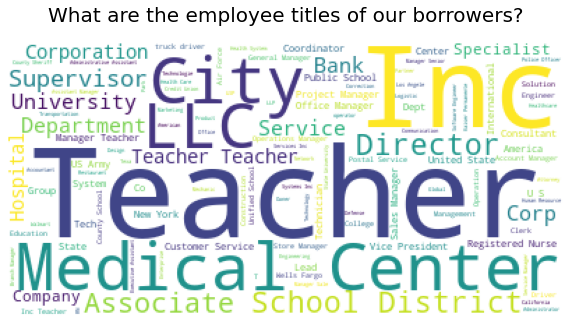

In [95]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(' '.join(emp for emp in credit.emp_title))

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("What are the employee titles of our borrowers?",fontsize=20, pad=20)
plt.show()

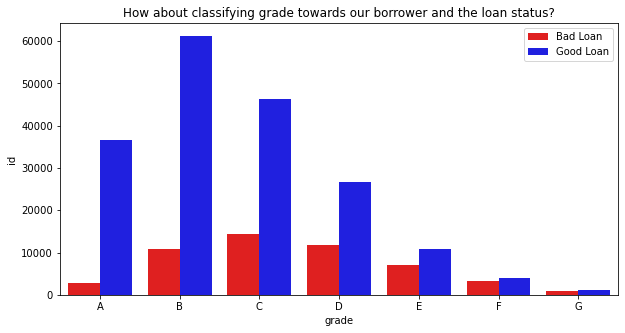

In [96]:
plt.figure(figsize=(10,5))
grade_loan = credit.groupby(['grade', 'loan_status'])['id'].count().reset_index()
p = sns.barplot(data=grade_loan, x='grade', y='id', hue='loan_status',palette=['red','blue'])
plt.title("How about classifying grade towards our borrower and the loan status?")
legend_labels, _= p.get_legend_handles_labels()
p.legend(legend_labels,['Bad Loan', 'Good Loan'])
plt.show(p)

## train test split

In [97]:
credit_train_feat = credit_a_out.loc[:, credit_a_out.columns != "loan_status"]
credit_train_target = credit_a_out["loan_status"]

In [98]:
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(credit_train_feat, credit_train_target, test_size=0.3, 
                                                    random_state=42, stratify=credit_train_target)
print('Class from training data df_train',Counter(y_train))

print('Class from testing data df_test',Counter(y_test))

Class from training data df_train Counter({1: 126579, 0: 34586})
Class from testing data df_test Counter({1: 54249, 0: 14823})


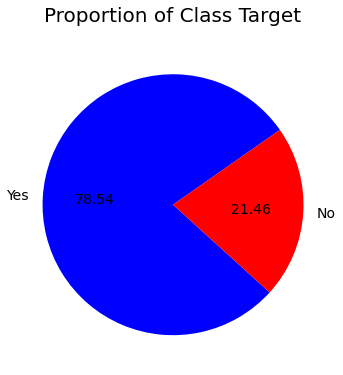

In [99]:
plt.figure(figsize=(6,6))
plt.pie(
        y_train.value_counts(),
        autopct='%.2f',
        labels=["Yes","No"],  
        textprops={'fontsize': 14},
        colors=["blue","red"], 
        startangle=35)

plt.title("Proportion of Class Target",fontsize=20, pad=20)
plt.show()

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import SMOTE

def log_transform(x):
  return np.log(x + 1)

# Pipeline to transform the numerical features
numerical = ['int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
             'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
             'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']
skewed = ['installment','annual_inc','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
          'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
          'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']
diff = list(set(numerical) - set(skewed))

smt = SMOTE(random_state=42)
ss = StandardScaler()
log_transformer = FunctionTransformer(log_transform) # remainder='passthrough'

numerical_transformer = Pipeline([('log', log_transformer),('ss', ss)])
ct = ColumnTransformer([('num_transformer', numerical_transformer, skewed), ('scaler', ss, diff)], remainder='passthrough')

In [101]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [102]:
credit.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
4,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,2004-11-01,3.0,0.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,2015-01-01,161.03,2015-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,11


## model machine learning

In [103]:
def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]
    
    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])
    
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    return ks.statistic, roc_auc

In [104]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
   
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

##  logistic regression

Training is success!
ROC AUC: 0.9768
KS: 0.8915 (p-value: 0.000e+00)
Classification report Logistic Regression : 
               precision    recall  f1-score   support

           0       0.82      0.94      0.87     14823
           1       0.98      0.94      0.96     54249

    accuracy                           0.94     69072
   macro avg       0.90      0.94      0.92     69072
weighted avg       0.95      0.94      0.94     69072



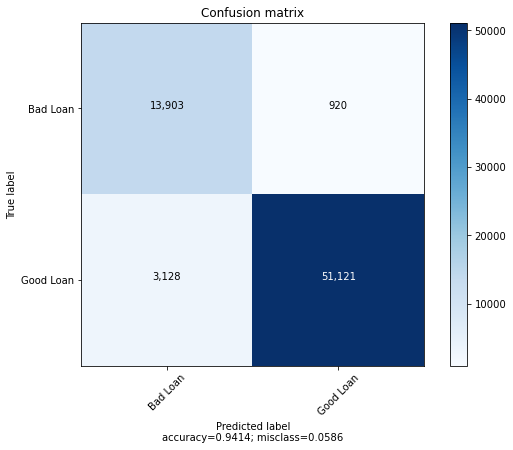

In [105]:
model_LR = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('RF', LogisticRegression(random_state=42) )
          ])
model_LR.fit(X_train, y_train) 
print("Training is success!")
y_pred = model_LR.predict_proba(X_test)
predicted = model_LR.predict(X_test)
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Logistic Regression : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

## random forest

Training is success!
ROC AUC: 0.9944
KS: 0.9440 (p-value: 0.000e+00)
Classification report Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94     14823
           1       0.99      0.97      0.98     54249

    accuracy                           0.97     69072
   macro avg       0.95      0.97      0.96     69072
weighted avg       0.97      0.97      0.97     69072



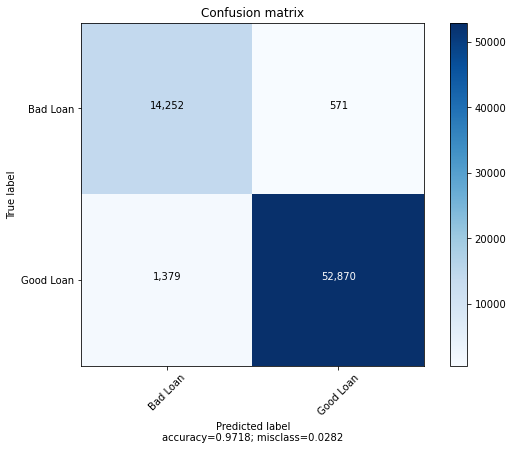

In [106]:
model_RF = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('RF', RandomForestClassifier(random_state=42) )
          ])
model_RF.fit(X_train, y_train) 
print("Training is success!")
y_pred = model_RF.predict_proba(X_test)
predicted = model_RF.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Random Forest Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

## model optimization & evaluation

model chosen : Random Forest Classifier

### hypermeter turning

In [114]:
def compute_feature_importance(voting_clf, weights):
    
    feature_importance = dict()
    for est in voting_clf.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    fe_scores = [0]*len(list(feature_importance.values())[0])
    for idx, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [115]:
feature_importance = pd.DataFrame()
feature_importance['features'] = X_train.columns
feature_importance['importance'] = model_RF.named_steps['RF'].feature_importances_

<Figure size 2160x720 with 0 Axes>

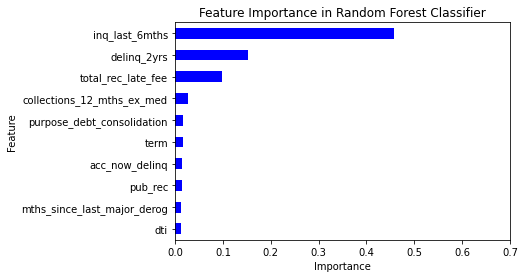

In [116]:
plt.figure(figsize=(30,10))
plot = feature_importance.sort_values('importance', ascending = False).head(10).plot.barh(color='blue',legend=None)
plot.set_yticklabels(feature_importance.sort_values('importance', ascending = False).head(10).features)
plt.title('Feature Importance in Random Forest Classifier')
plt.xlim([0,0.7])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()